# **Analyze the Influence of Crime Types on the Arrest Rate in Different Areas of Chicago.**

## Introduction ##

Crime is a complex and multifaceted issue that has significant implications for public safety and community well-being. In general, Crime could be divided into two types, violent and non-violent crime; furthermore, crimes like "Homicide", "Assault", and "Robbery" are considered violent, while crimes like "Theft" and "Property damage" are non-violent. The city of Chicago, like many urban centers, experiences a diverse range of criminal activities. Therefore, Chicago has been grappling with crime-related concerns, and understanding the factors influencing arrest rates can offer valuable insights into effective law enforcement strategies and community safety. This dataset reference is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system and hosted in Google BigQuery, which contains incidents of crime except murders that occurred in the city of Chicago from 2001 to 2024.

This project seeks to analyze the relationship between different crime types and areas of Chicago and the arrest rate from 2002 to 2023. Also, we will explore the influence of some economic factors on different crime types in various regions, contributing to our understanding of the nuanced factors affecting arrest rates in Chicago. Throughout our analysis, we will employ statistical tools, including histograms, box plots, and line charts, to visually represent the relationships between crime types, locations, and arrest rates. These visualizations will provide valuable insights into patterns and trends within the dataset.

The outcome of this project is arrest rate and there are two independent variables, crime types and location. For the first variable (X_1), there are 35 crime types in the dataset. The second variable (X_2) is the community area which includes 77 areas where the incident occurred in Chicago. The type of crime in a given area can significantly affect law enforcement strategies, community safety perceptions, and arrest rates. In addition, factors such as socioeconomic conditions, population density, and community policing strategies may contribute to differences in arrest rates across locations. Hence, after this research, we could understand how different crime types and locations relate to arrest rates, and so learn more about Chicago's crime dynamics. However, it is essential to acknowledge the limitations inherent in this study, such as potential data constraints and external factors influencing crime dynamics.

## Data Cleaning and Loading

Before summarising, we need to clean our original dataset first. In this section, we will drop some columns that are useless to our research, such as 'ICUR', 'Domestic', 'Beat', and 'Ward'. Moreover, in the years 2001 and 2024, the number of incidents is much less than in other years, so we decided to remove these two years' data. Also, there are some incidents that do not keep detailed records, so we need to clean those data to get a more complete dataset, called 'chicago_crime_clean'. To keep the data clean, we change the data of 'District' and 'Community Area' from float to integer.

In [133]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
relative_path = os.path.join('..', 'Data', 'Chicago_Crime.csv')
abs_path = os.path.abspath(relative_path)

# Read the CSV file
chicago_crime = pd.read_csv(abs_path)

In [123]:
# Drop missing value
chicago_crime_clean = chicago_crime.dropna()
# Drop useless columns
chicago_crime_clean = chicago_crime_clean.drop(['Date','IUCR','Location Description','Domestic','Beat',
                                                'Ward','Block','FBI Code','X Coordinate','Y Coordinate',
                                                'Updated On'], axis=1)
# Drop year 2001 and 2024
chicago_crime_clean = chicago_crime_clean[(chicago_crime_clean['Year'] != 2001) & (chicago_crime_clean['Year'] != 2024)]
# Change 'District' and ' Community Area' data into int
chicago_crime_clean['District'] = chicago_crime_clean['District'].astype(int)
chicago_crime_clean['Community Area'] = chicago_crime_clean['Community Area'].astype(int)
# Drop community area missing value
chicago_crime_clean = chicago_crime_clean[chicago_crime_clean['Community Area'] !=0]
chicago_crime_clean.head()

,ID,Case Number,Primary Type,Description,Arrest,District,Community Area,Year,Latitude,Longitude,Location
11,12045583,JD226426,THEFT,$500 AND UNDER,False,2,35,2020,41.830482,-87.621752,"(41.830481843, -87.621751752)"
12,12031001,JD209965,BATTERY,SIMPLE,True,9,60,2020,41.836310,-87.639624,"(41.836310224, -87.639624112)"
13,12093529,JD282112,ASSAULT,AGGRAVATED - HANDGUN,True,4,46,2020,41.747610,-87.549179,"(41.747609555, -87.549179329)"
14,12178140,JD381597,BATTERY,SIMPLE,False,7,67,2020,41.774878,-87.671375,"(41.77487752, -87.671374872)"
15,4144897,HL474854,BATTERY,AGGRAVATED: OTHER DANG WEAPON,False,7,68,2005,41.781003,-87.652107,"(41.781002663, -87.652107119)"


In [124]:
chicago_crime_clean.shape

(7268092, 11)

## Summary Statistics Tables

### X_1: Crime Types

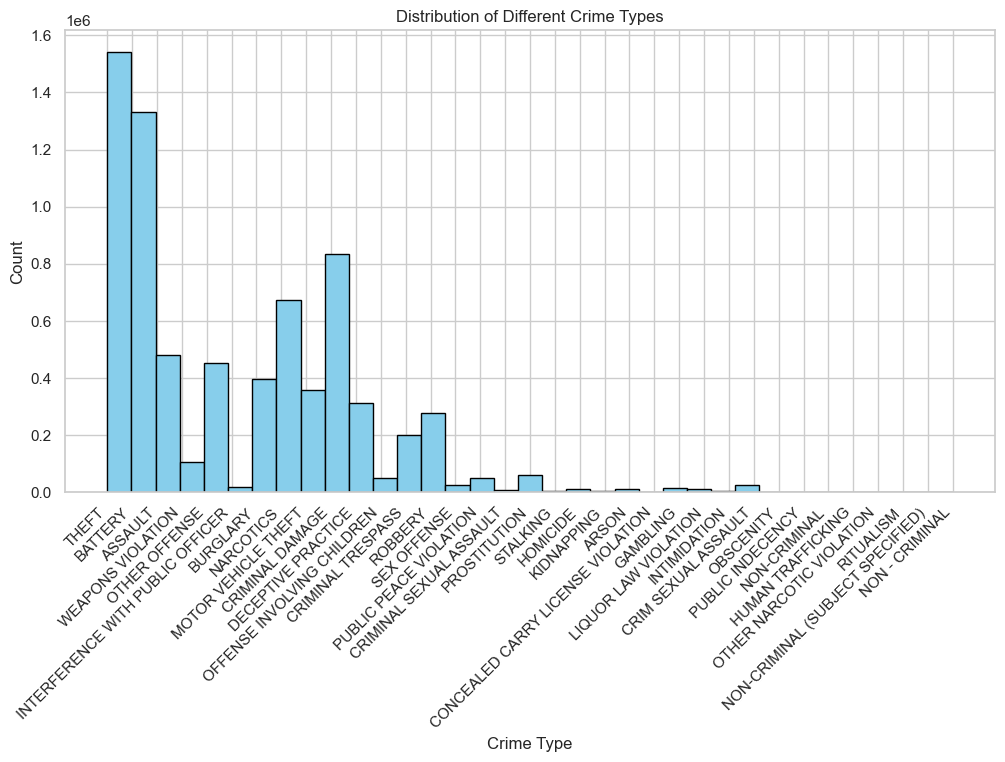

In [227]:
crime_type_counts = chicago_crime_clean['Primary Type'].value_counts()

# Create a histogram
plt.figure(figsize=(12, 6))
plt.hist(chicago_crime_clean['Primary Type'], bins=len(crime_type_counts), color='skyblue', edgecolor='black')
plt.title('Distribution of Different Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

The histogram is the distribution of crime types and it looks right-skewed, but we cannot give up any crime types' data since we are going to analyze how crime types influence arrest rates, also these incidents will keep happening in our lives even though the amount that occurs is small. The graph gives us information that the number of crime types of theft and battery is the highest.

In [238]:
# Create a pivot table to count the number of 'True' and 'False' in each primary type
arrest_count = chicago_crime_clean.pivot_table(index='Primary Type', columns='Arrest', aggfunc='size', fill_value=0)
# Rename culumns to clarify
arrest_count.columns = ['Arrested (False)', 'Arrested (True)']
arrest_count = arrest_count.reset_index()
arrest_count

,Primary Type,Arrested (False),Arrested (True)
0,ARSON,10781,1458
1,ASSAULT,382039,100044
2,BATTERY,1040637,290995
3,BURGLARY,373154,22361
4,CONCEALED CARRY LICENSE VIOLATION,44,1172
5,CRIM SEXUAL ASSAULT,20318,3595
6,CRIMINAL DAMAGE,779349,54229
7,CRIMINAL SEXUAL ASSAULT,6663,461
8,CRIMINAL TRESPASS,62190,137047
9,DECEPTIVE PRACTICE,273095,40430


The pivot table shows the first variable, crime types, influence on the arrest rate from 2002 to 2023 in Chicago. This table includes all 35 crime types and we only consider primary types and exclude all other factors here. We can see how many successful and unsuccessful arrests for each crime type. However, it is difficult to identify which crime types have higher and lower arrest rates, so we will show the result below.

In [126]:
# Identify the crime type with the maximum 'True' arrests
max_arrested_type = arrest_count.loc[arrest_count['Arrested (True)'].idxmax()]
print(max_arrested_type)

# Identify the crime type with the minimum 'True' arrests
min_arrested_type = arrest_count.loc[arrest_count['Arrested (True)'].idxmin()]
print(min_arrested_type)

# Identify the crime type with the maximum 'False' arrests
max_unarrested_type = arrest_count.loc[arrest_count['Arrested (False)'].idxmax()]
print(max_unarrested_type)

# Identify the crime type with the minimum 'False' arrests
min_unarrested_type = arrest_count.loc[arrest_count['Arrested (False)'].idxmin()]
print(min_unarrested_type)

Primary Type        NARCOTICS
Arrested (False)         4354
Arrested (True)        668226
Name: 18, dtype: object
Primary Type        RITUALISM
Arrested (False)           13
Arrested (True)             2
Name: 29, dtype: object
Primary Type          THEFT
Arrested (False)    1374957
Arrested (True)      165412
Name: 33, dtype: object
Primary Type        PUBLIC INDECENCY
Arrested (False)                   3
Arrested (True)                  184
Name: 27, dtype: object


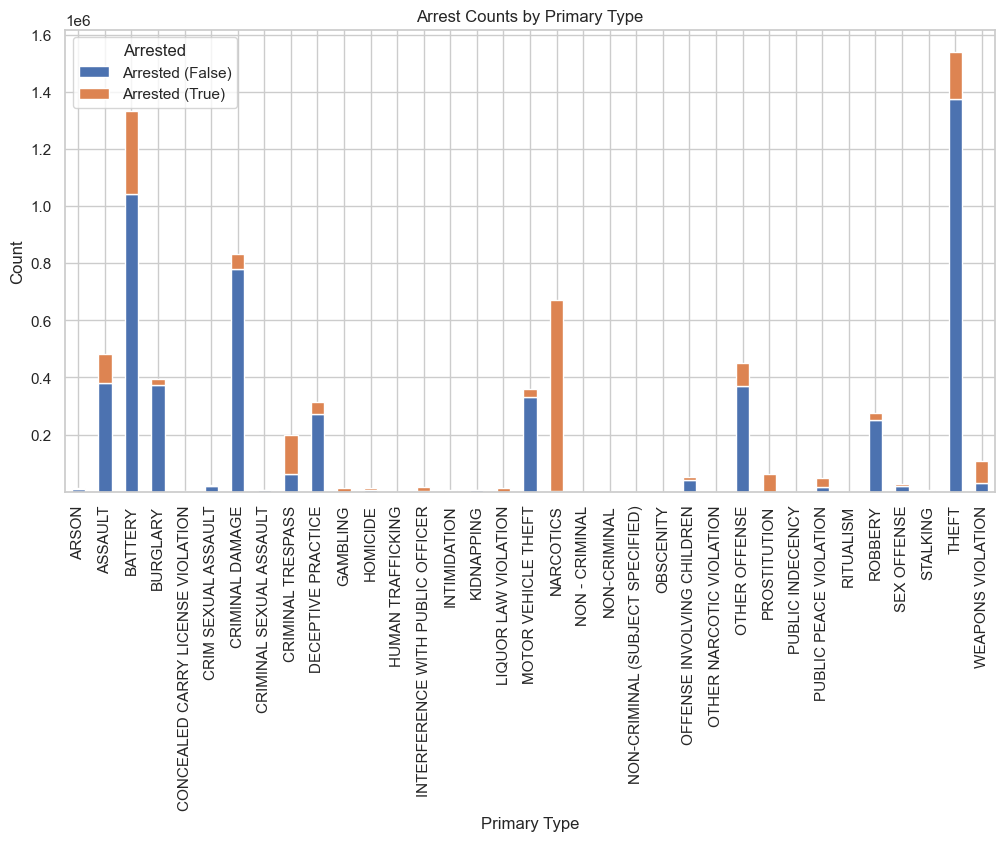

In [239]:
arrest_count.set_index('Primary Type', inplace=True)

# Plot the bar plot
arrest_count.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Arrest Counts by Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.legend(title='Arrested')
plt.show()

It is clear to see that in all of the 35 crime types, 'Narcotics' has the highest arrest rate with 668226, while 'Ritualism' has the lowest rate, which is 2. In addition, of all the types of crimes that were not apprehended, 'Thief' is the most, with 1374957, but 'Public indecency' is the opposite with 3. And from the graph above, the x-axis is the primary crime type and the y-axis is the number of successful and unsuccessful arrests. We can see that only a few types of crime have more arrests than no arrests, like 'Narcotics', 'Criminal trespass', and 'Weapons violation'. However, this data is not accurate since we only show the ratio of arrests to non-arrests, but we do not know the specific rates. Therefore, we need to calculate the percentage of arrest rate and then compare it to see more valuable results.

In [128]:
arrest_count['Percent_Arrested (True)'] = (arrest_count['Arrested (True)'] / (arrest_count['Arrested (False)'] + 
                                                                              arrest_count['Arrested (True)'])) * 100
print(arrest_count.loc[arrest_count['Percent_Arrested (True)'].idxmax()])
print(arrest_count.loc[arrest_count['Percent_Arrested (True)'].idxmin()])
print(arrest_count.describe())

Arrested (False)             277.000000
Arrested (True)            61181.000000
Percent_Arrested (True)       99.549286
Name: PROSTITUTION, dtype: float64
Arrested (False)           373154.000000
Arrested (True)             22361.000000
Percent_Arrested (True)         5.653641
Name: BURGLARY, dtype: float64
       Arrested (False)  Arrested (True)  Percent_Arrested (True)
count      3.500000e+01        35.000000                35.000000
mean       1.546419e+05     53017.828571                39.722640
std        3.172978e+05    122869.167972                35.960329
min        3.000000e+00         2.000000                 5.653641
25%        1.415000e+02       602.000000                11.391152
50%        6.564000e+03      9432.000000                18.708718
75%        1.565435e+05     47329.500000                70.799459
max        1.374957e+06    668226.000000                99.549286


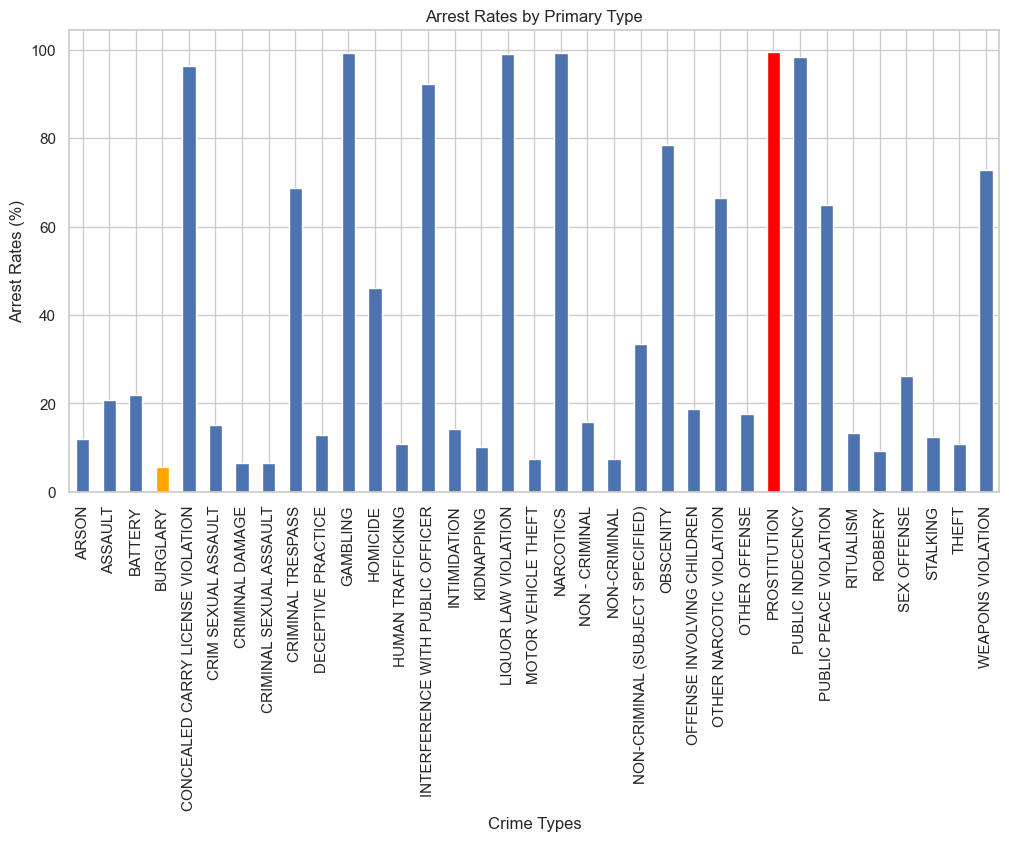

In [157]:
ax = arrest_count.plot(kind='bar', y='Percent_Arrested (True)', legend=False, figsize=(12, 6))
max_index = arrest_count['Percent_Arrested (True)'].idxmax()
min_index = arrest_count['Percent_Arrested (True)'].idxmin()
ax.patches[arrest_count.index.get_loc(max_index)].set_facecolor('red')
ax.patches[arrest_count.index.get_loc(min_index)].set_facecolor('orange')
plt.title('Arrest Rates by Primary Type')
plt.xlabel('Crime Types')
plt.ylabel('Arrest Rates (%)')
plt.show()

Now, we can easily see that the crime type of prostitution has the highest arrest rate at about 99.549%, while the type of burglary has the lowest arrest rate at about 5.654%. Also, the average arrest rate is 39.723% approximately, which means more than half of the suspects are not arrested. This bar chart with each crime type on the x-axis and arrest rates on the y-axis, shows that most of the crime types have either high arrest rates greater than 60% or low arrest rates less than 25%. According to the distribution of crime types before, we found that theft and battery are the most frequent occurrences but their arrest rates are not the highest, which describes from the side that it is very difficult to catch this type of criminal. Again, it expresses crime types will influence arrest rates to a certain degree.

### X_2: Areas of Chicago

In this part, we will focus on how community areas will influence arrest rates without other factors.

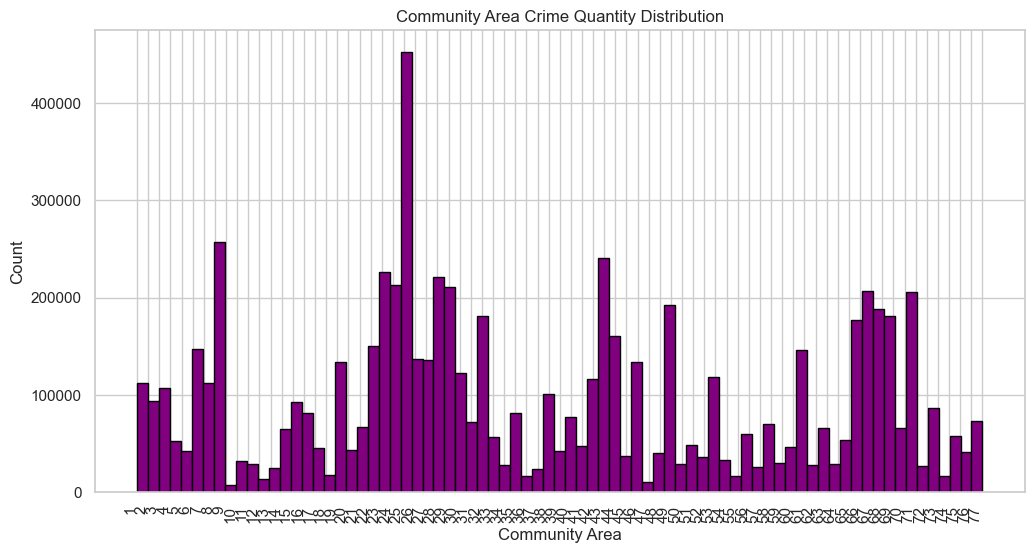

In [252]:
area_counts = chicago_crime_clean['Community Area'].value_counts()

# Create a histogram
plt.figure(figsize=(12, 6))
plt.hist(chicago_crime_clean['Community Area'], bins=len(area_counts), color='purple', edgecolor='black')
plt.title('Community Area Crime Quantity Distribution')
plt.xlabel('Community Area')
plt.ylabel('Count')
plt.xticks(sorted(chicago_crime_clean['Community Area'].unique()), rotation=90, ha='right')
plt.show()

The histogram above shows the number of crimes distributed in each community area in Chicago. It is significant to see that Area 25 has the most quantity and Area 9 has the lowest from 2002 to 2023. We will see whether these two areas also have the most and least arrest rates later.

In [253]:
# Create a pivot table to count the number of 'True' and 'False' in each community area
arrest_count2 = chicago_crime_clean.pivot_table(index='Community Area', columns='Arrest', aggfunc='size', fill_value=0)
arrest_count2.columns = ['Arrested (False)', 'Arrested (True)']
arrest_count2 = arrest_count2.reset_index()
arrest_count2

,Community Area,Arrested (False),Arrested (True)
0,1,83419,29095
1,2,78552,15000
2,3,75831,31001
3,4,43001,9170
4,5,35139,7591
...,...,...,...
72,73,67888,18825
73,74,13758,2530
74,75,45596,12323
75,76,31588,9492


In [131]:
# Identify the community area with the maximum 'True' arrests
max_arrested_area = arrest_count2.loc[arrest_count2['Arrested (True)'].idxmax()]
print(max_arrested_area)

# Identify the community area with the minimum 'True' arrests
min_arrested_area = arrest_count2.loc[arrest_count2['Arrested (True)'].idxmin()]
print(min_arrested_area)

# Identify the community area with the maximum 'False' arrests
max_unarrested_area = arrest_count2.loc[arrest_count2['Arrested (False)'].idxmax()]
print(max_unarrested_area)

# Identify the community area with the minimum 'False' arrests
min_unarrested_area = arrest_count2.loc[arrest_count2['Arrested (False)'].idxmin()]
print(min_unarrested_area)

Community Area          25
Arrested (False)    284329
Arrested (True)     168020
Name: 24, dtype: int64
Community Area         9
Arrested (False)    6387
Arrested (True)      823
Name: 8, dtype: int64
Community Area          25
Arrested (False)    284329
Arrested (True)     168020
Name: 24, dtype: int64
Community Area         9
Arrested (False)    6387
Arrested (True)      823
Name: 8, dtype: int64


From the table above, we know that there are 77 community areas in Chicago. Moreover, the summary information tells us area 25 has the highest number of successful arrests with 168020 but also the highest number of unsuccessful arrests with 284329. Area 9 has the same situation and has the lowest number of successful and unsuccessful arrests with 823 and 6387. This result is the same as what we got from the histogram before. The summary above illustrates community areas will cause the difference in arrest rates. Now, we will calculate the percentage of arrest rates to get more detailed.

In [137]:
arrest_count2['Percent_Arrested (True)'] = (arrest_count2['Arrested (True)'] / (arrest_count2['Arrested (False)'] + 
                                                                              arrest_count2['Arrested (True)'])) * 100
print(arrest_count2.loc[arrest_count2['Percent_Arrested (True)'].idxmax()])
print(arrest_count2.loc[arrest_count2['Percent_Arrested (True)'].idxmin()])
print(arrest_count2.describe())

Community Area                26.000000
Arrested (False)           77811.000000
Arrested (True)            58620.000000
Percent_Arrested (True)       42.966774
Name: 25, dtype: float64
Community Area                12.000000
Arrested (False)           12100.000000
Arrested (True)             1402.000000
Percent_Arrested (True)       10.383647
Name: 11, dtype: float64
       Community Area  Arrested (False)  Arrested (True)  \
count       77.000000         77.000000        77.000000   
mean        39.000000      70291.792208     24099.012987   
std         22.371857      54214.181844     25795.026325   
min          1.000000       6387.000000       823.000000   
25%         20.000000      28961.000000      6857.000000   
50%         39.000000      53404.000000     14875.000000   
75%         58.000000      99376.000000     33282.000000   
max         77.000000     284329.000000    168020.000000   

       Percent_Arrested (True)  
count                77.000000  
mean                 22

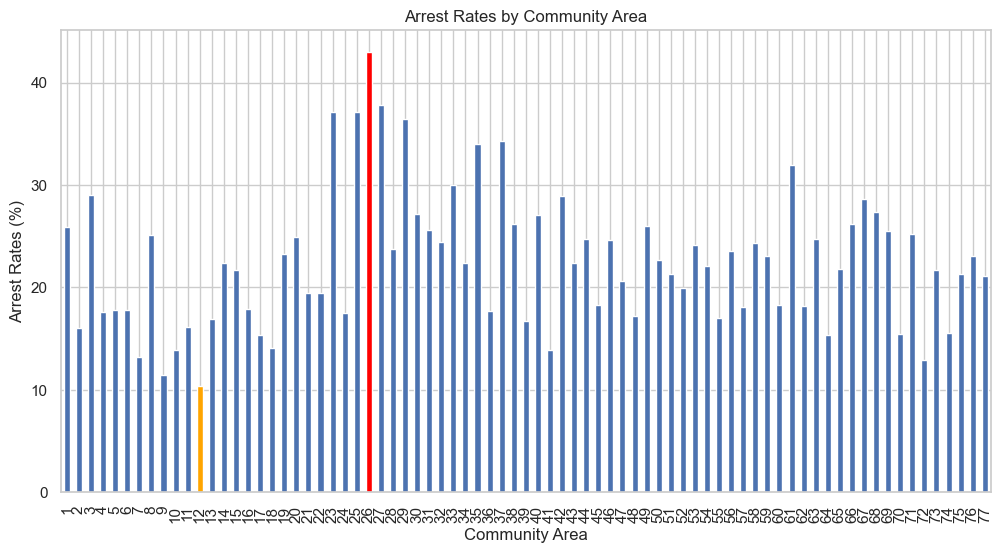

In [158]:
ax2 = arrest_count2.plot(kind='bar', x='Community Area', y='Percent_Arrested (True)', legend=False, figsize=(12, 6))
max_index2 = arrest_count2['Percent_Arrested (True)'].idxmax()
min_index2 = arrest_count2['Percent_Arrested (True)'].idxmin()
ax2.patches[arrest_count2.index.get_loc(max_index2)].set_facecolor('red')
ax2.patches[arrest_count2.index.get_loc(min_index2)].set_facecolor('orange')
plt.title('Arrest Rates by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Arrest Rates (%)')
plt.show()

The scatter plot above shows each community area with respect to arrest rates. Through observation, we can see that Area 12 has the lowest arrest rate at 10.384%, and Area 26 has the highest arrest rate at 42.967%. It is different from what we discussed before, Area 25 and Area 9 do not have the highest and lowest arrest rates, so there should be other factors that influence it. In addition, the average arrest rate is about 22.535%, which is less than the arrest rates we have seen before based on the type of crime. Hence, our research question is reasonable cause these two variables will affect arrest rates, and we will combine crime types and community areas to get more specific research.

### Combine two variables

In [221]:
combine = chicago_crime_clean.groupby(['Community Area','Primary Type']).agg({'Arrest':['sum','mean']})
combine.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in combine.columns]

# Sort the DataFrame by the sum of arrests in descending order
combine_sort_sum = combine.sort_values(by=('Arrest_sum'),ascending=False)
print(combine_sort_sum.head())

# Sort the DataFrame by the mean of arrests in descending order
combine_sort_mean = combine.sort_values(by=('Arrest_mean'),ascending=False)
print(combine_sort_mean.head())

                             Arrest_sum  Arrest_mean
Community Area Primary Type                         
25             NARCOTICS          92320     0.997881
23             NARCOTICS          49704     0.996951
29             NARCOTICS          43836     0.993203
26             NARCOTICS          35966     0.997615
27             NARCOTICS          29452     0.997224
                                                  Arrest_sum  Arrest_mean
Community Area Primary Type                                              
35             LIQUOR LAW VIOLATION                       36          1.0
51             CONCEALED CARRY LICENSE VIOLATION           9          1.0
10             GAMBLING                                   14          1.0
23             NON - CRIMINAL                              1          1.0
50             PUBLIC INDECENCY                            2          1.0


The statistics data above shows the number of top five arrests and average arrests based on different community areas and crime types. We can see that no matter in which community area, the 'Narcotics' crime type has the highest number of arrests. But combining the second data, it does not have the highest arrest rates, which implies there are more crimes than arrests. The second statistical data shows the top five data based on average arrests, so we can see that some cases in different community areas have 100% arrest rates. Hence, these data verify our guess that crime types and community areas influence arrest rates.

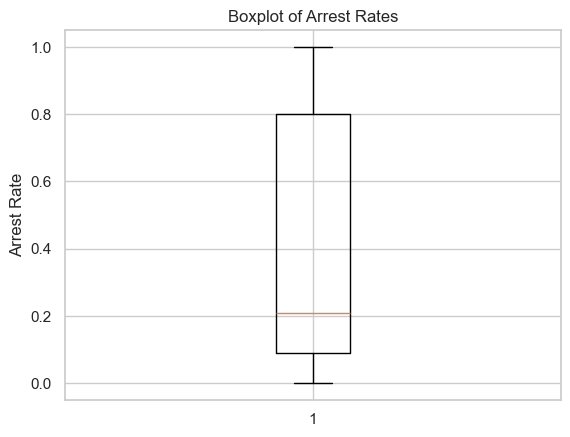

In [218]:
arrest_rates = combine['Arrest_mean']

# Create a boxplot for arrest rates
plt.boxplot(arrest_rates)
plt.title('Arrest Rates')
plt.ylabel('Arrest Rate')
plt.show()

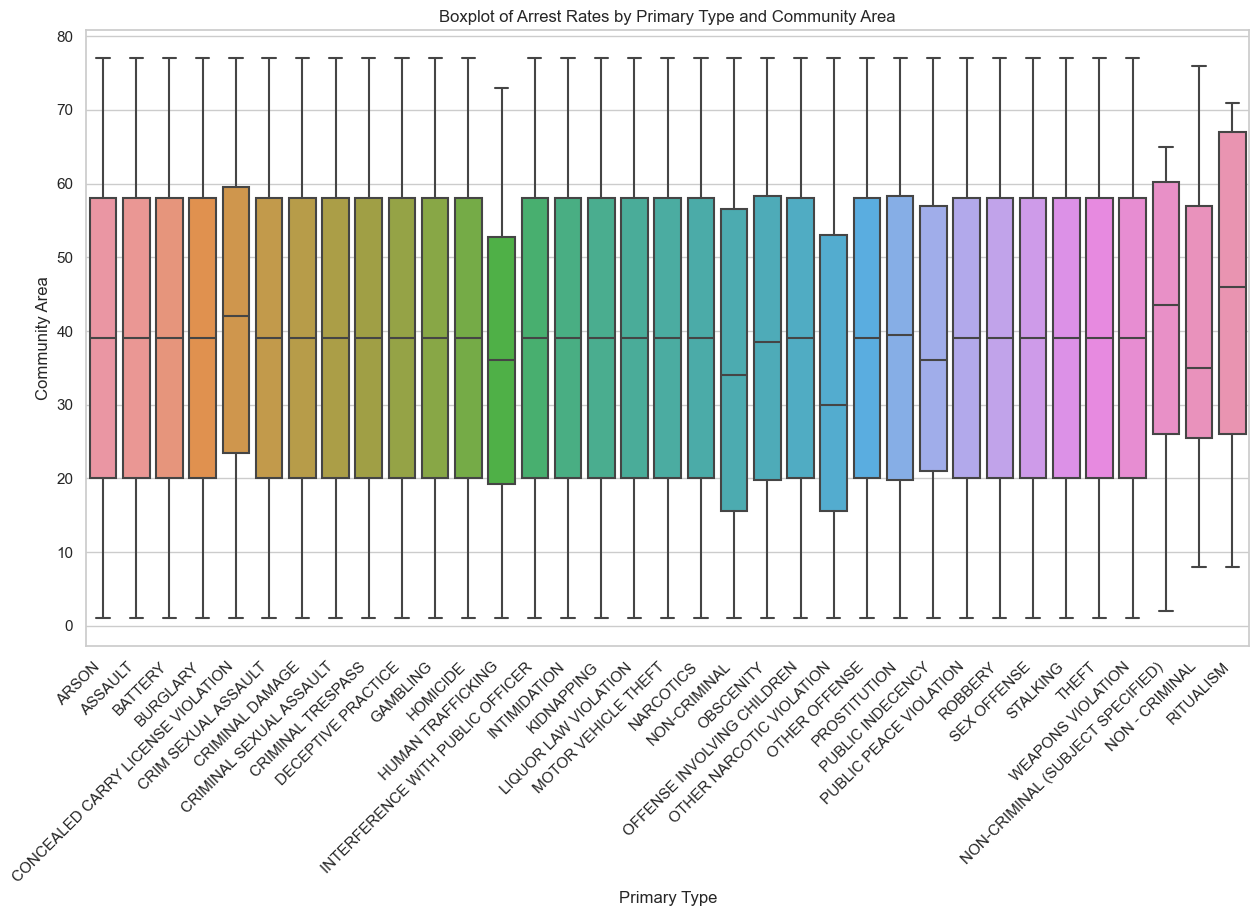

In [226]:
combine_reset = combine.reset_index()
plt.figure(figsize=(15, 8))
sns.boxplot(x='Primary Type', y='Community Area', data=combine_reset)
plt.xticks(rotation=45, ha='right')
# Add labels and title
plt.title('Boxplot of Arrest Rates by Primary Type and Community Area')
plt.xlabel('Primary Type')
plt.ylabel('Community Area')

# Show the plot
plt.show()

## Coclusion